<a href="https://colab.research.google.com/github/matheusalanojoenck/ANN/blob/master/Tarefa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

Carregando a imagem que será usada para aplicar os filtros que estão sendo estudados.

In [9]:
#Carregando imagem
img02_url = '/content/drive/MyDrive/UDESC/PIM - Processamento de Imagens/Imagens para testes/img02.jpg'
chessborad_url = '/content/drive/MyDrive/UDESC/PIM - Processamento de Imagens/Imagens para testes/chessboard_inv.png'
img02 = Image.open(img02_url)
chessboard  = Image.open(chessborad_url)

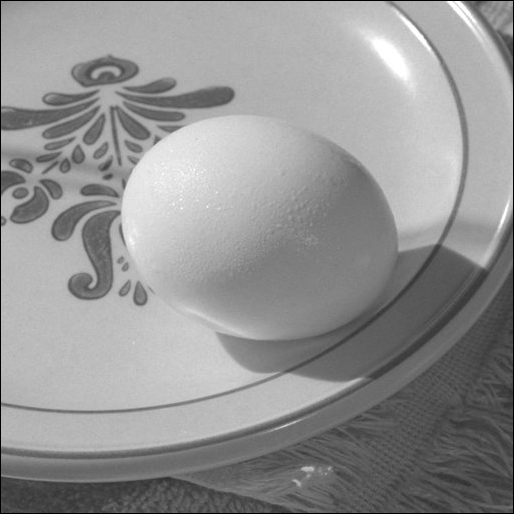

In [7]:
#Tamnho da imagem original
img02_old_size = img02.size

#Definindo tamanho para no imagem
img02_new_size = (img02_old_size[0]+2, img02_old_size[1]+2)

#Criando nova imagem de fundo preto com o tamanho 2 pixel maior na altura e largura que a imagem original
img02_w_border = Image.new("L", img02_new_size)
#Colando a imagem original no centro da nova imagem, adicionado uma borda com uma espessura de 1 pixel
img02_w_border.paste(img02, ((img02_new_size[0]-img02_old_size[0])//2, (img02_new_size[1]-img02_old_size[1])//2))
img02_w_border

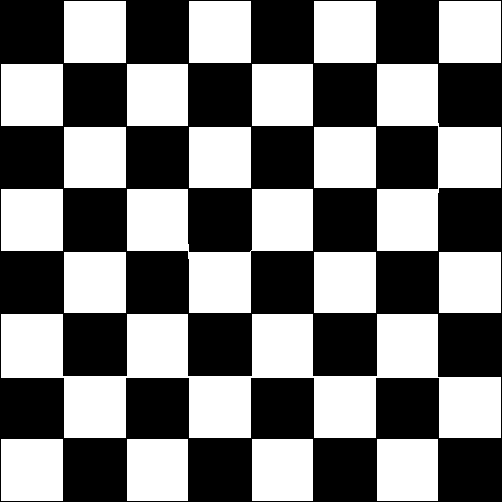

In [11]:
#Tamnho da imagem original
chessboard_old_size = chessboard.size

#Definindo tamanho para no imagem
chessboard_new_size = (chessboard_old_size[0]+2, chessboard_old_size[1]+2)

#Criando nova imagem de fundo preto com o tamanho 2 pixel maior na altura e largura que a imagem original
chessboard_w_border = Image.new("L", chessboard_new_size)
#Colando a imagem original no centro da nova imagem, adicionado uma borda com uma espessura de 1 pixel
chessboard_w_border.paste(chessboard, ((chessboard_new_size[0]-chessboard_old_size[0])//2, (chessboard_new_size[1]-chessboard_old_size[1])//2))
chessboard_w_border

Parte A: Função que retorna as coordenas dos pontos vizinhos a um determinado ponto.

In [12]:
# Retorna uma matriz com todas as coordedas dos elementos vizinhos de um ponto 
# em uma matriz bidimensional
#
# NO N NE 
# O C L 
# SO S SE
def vizinhos(i, j):
  return np.array([ 
    [(i-1,j-1), (i-1,j), (i-1,j+1)],  
    [(i,j-1),   (i,j),   (i,j+1)  ],    
    [(i+1,j-1), (i+1,j), (i+1,j+1)]
  ])

Parte B: Filtro de reforço utilizando o operador Laplaciano 

In [13]:
# Função que recebe uma imagem e (i,j) como coordernadas de um ponto
# nessa imagem e aplica o filtro laplaciano nesse ponto
def laplaciano(imagem, i, j):
  # Array com os valores para o filtro laplaciano
  nabla_f = np.array([[1, 1, 1],
                      [1, -8, 1],
                      [1, 1, 1]])
  
  # Array que vai guardar os valores dos pixies da coordenada (i,j)
  # e de seus vizinhos
  A = np.array([[0, 0, 0],
                [0, 0, 0],
                [0, 0, 0]])
  # viz contém as coordenadas dos pixel (i,j) e seus vizinhos
  viz = vizinhos(i,j);

  # Iterendo sobre o array que contém as coordenadas dos pixeis
  for m in range(len(viz)):
    for n in range(len(viz[m])):
      x = viz[m][n][0]
      y = viz[m][n][1]

      # Colocando na matriz A os valores dos pixies
      A[m][n] = imagem.getpixel((int(x), int(y)))
  
  # Realizando a somatoria das multiplicações entre as matrizes A e Sx
  sum = np.sum(np.multiply(nabla_f, A))

  return sum

In [14]:
# Função que recebe uma imagem e aplica o filtro SobelX/Y em toda a imagem
def laplace (src_image):
  largura, altura = src_image.size

  #Nova imagem em que o resultado do filtro de sobel sera armazenado
  img_output= Image.new("L", (largura, altura))

  # Iterendo sobre todos os pixies da imagem
  for j in range(1, int((altura-1))):
    for i in range(1, int((largura-1))):

      nabla = laplaciano(src_image, i, j)

      img_output.putpixel((i, j), int(nabla))
  return img_output

Resultado do operador laplaciano sobre a imagem

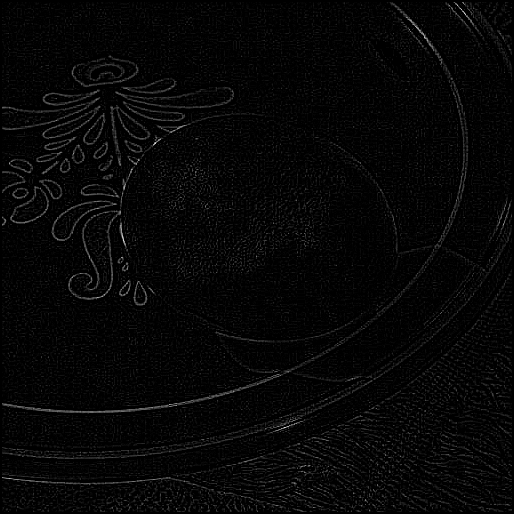

In [16]:
img02_output_laplace  = laplace(img02_w_border)
img02_output_laplace


Parte C:

Função sobelX

In [17]:
# Função que recebe uma imagem e (i,j) como coordernadas de um ponto
# nessa imagem e aplica o filtro sobelX nesse ponto
def sobelX(imagem, i, j):
  # Array com os valores para o filtro sobelX
  Sx = np.array([[-1, 0, 1], 
                 [-2, 0, 2], 
                 [-1, 0, 1]])
  
  # Array que vai guardar os valores dos pixies da coordenada (i,j)
  # e de seus vizinhos
  A = np.array([[0, 0, 0],
                [0, 0, 0],
                [0, 0, 0]])
  sum = 0

  # viz contém as coordenadas dos pixel (i,j) e seus vizinhos
  viz = vizinhos(i,j);

  # Iterendo sobre o array que contém as coordenadas dos pixeis
  for m in range(len(viz)):
    for n in range(len(viz[m])):
      x = viz[m][n][0]
      y = viz[m][n][1]

      # Colocando na matriz A os valores dos pixies
      A[m][n] = imagem.getpixel((int(x), int(y)))
  
  # Realizando a somatoria das multiplicações entre as matrizes A e Sx
  sum = np.sum(np.multiply(Sx, A))

  return sum


Funçao sobelY

In [18]:
# Função que recebe uma imagem e (i,j) como coordernadas de um ponto
# nessa imagem e aplica o filtro sobelY nesse ponto
def sobelY(imagem, i, j):

  # Array com os valores para o filtro sobelY
  Sy = np.array([[-1, -2, -1], 
                 [0, 0, 0], 
                 [1, 2, 1]])
  
  # Array que vai guardar os valores dos pixies da coordenada (i,j)
  # e de seus vizinhos
  A = np.array([[0, 0, 0],
                [0, 0, 0],
                [0, 0, 0]])
  sum = 0

  # viz contém as coordenadas dos pixel (i,j) e seus vizinhos
  viz = vizinhos(i,j);

  # Iterendo sobre o array que contém as coordenadas dos pixeis
  for m in range(len(viz)):
    for n in range(len(viz[m])):
      x = viz[m][n][0]
      y = viz[m][n][1]

      # Colocando na matriz A os valores dos pixies
      A[m][n] = imagem.getpixel((int(x), int(y)))
      
  # Realizando a somatoria das multiplicações entre as matrizes A e Sx
  sum = np.sum(np.multiply(Sy, A))
  
  return sum

In [44]:
# Função que recebe uma imagem e aplica o filtro SobelX/Y em toda a imagem
def sobel(src_image, filter_type):
  largura, altura = src_image.size

  # Nova imagem em que o resultado do filtro de sobel sera armazenado
  img_output= Image.new("L", (largura, altura))

  if (filter_type.upper() == 'XY'):

    # Iterendo sobre todos os pixies da imagem
    for j in range(1, int((altura-1))):
      for i in range(1, int((largura-1))):

        # Calculando Gx em um pixel
        Gx = sobelX(src_image, i, j)

        # Calculando Gy em um pixel
        Gy = sobelY(src_image, i, j)

        # Calculando G
        G = np.abs(Gx) + np.abs(Gy)

        # Aplicando G, Gx ou Gy na imagem de saída
        img_output.putpixel((i, j), int(G))
    return img_output

  elif (filter_type.upper() == 'X'):
    # Iterendo sobre todos os pixies da imagem
    for j in range(1, int((altura-1))):
      for i in range(1, int((largura-1))):

        # Calculando Gx em um pixel
        Gx = sobelX(src_image, i, j)

        # Aplicando G, Gx ou Gy na imagem de saída
        img_output.putpixel((i, j), int(Gx))
    return img_output
  elif (filter_type.upper() == 'Y'):
    # Iterendo sobre todos os pixies da imagem
    for j in range(1, int((altura-1))):
      for i in range(1, int((largura-1))):

        # Calculando Gy em um pixel
        Gy = sobelY(src_image, i, j)

        # Aplicando G, Gx ou Gy na imagem de saída
        img_output.putpixel((i, j), int(Gy))
    return img_output
  else :
    print('O tipo do filtro deve ser, X, Y ou XY')
    return null

Aplicando SobelX e SobelY na imagem

In [45]:
img02_output_sobelXY = sobel(img02_w_border, 'XY')

Resultado da aplicação do filtro de sobel.

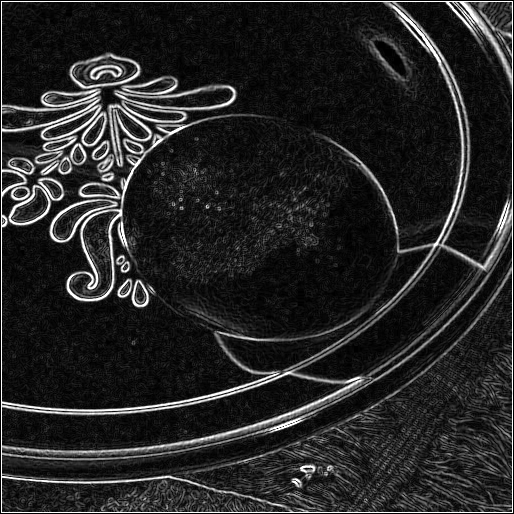

In [46]:
img02_output_sobelXY

In [47]:
chessboard_output_sobelXY = sobel(chessboard_w_border, 'XY')

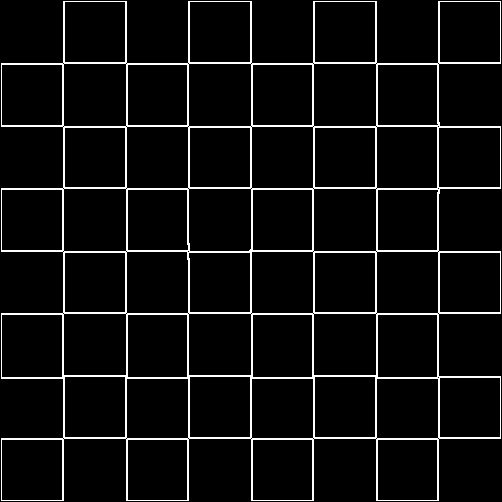

In [48]:
chessboard_output_sobelXY

Parte D:

I: Aplicando limiarização ao filtro de sobel

In [26]:
def limiar(img, K):
  # Tranformando a imagem em um array
  img_array = np.asarray(img)

  mag = np.median(img_array)
  sigma = np.std(img_array)
  T = mag + K*sigma
  img_output = Image.new(img.mode, img.size)

  for j in range(img.size[0]):
    for i in range(img.size[1]):
      if (img.getpixel((i, j)) >= T ):
        img_output.putpixel((i, j), 255)
        #print('if')
      else:
        img_output.putpixel((i, j), 0)
        #print('else')

  return img_output

In [27]:
img02_limiar_k1 = limiar(img02_output_sobelXY, 1)

Resultado da limiarização, com K = 1, aplicado sobre uma imagem com filtro de sobel

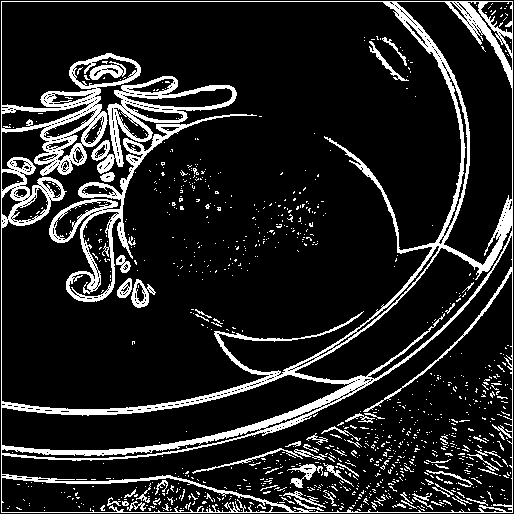

In [28]:
img02_limiar_k1

In [29]:
img02_limiar_k2 = limiar(img02_output_sobelXY, 2)

Resultado da limiarização, com K = 2, aplicado sobre uma imagem com filtro de sobel

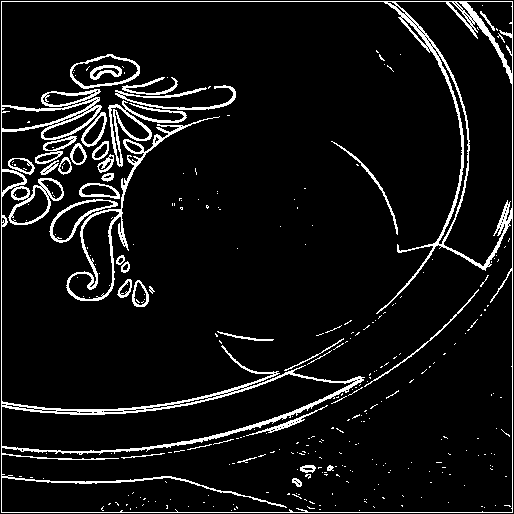

In [30]:
img02_limiar_k2

In [31]:
img02_limiar_k3 = limiar(img02_output_sobelXY, 3)

Resultado da limiarização, com K = 3, aplicado sobre uma imagem com filtro de sobel

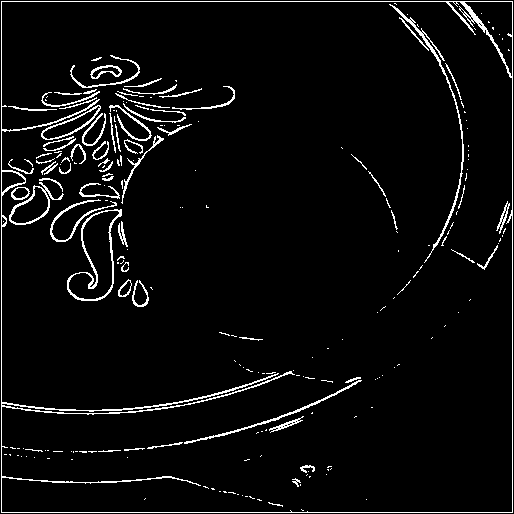

In [32]:
img02_limiar_k3

Podemos notar que, conforme o valor de K aumenta, as bordas detectadas pelo filtro de sobel, vão ficando mais definidas, removendo artefatos que não são uma borda.

Parte D:

II: Calculando direção das magnitudes do filtro de sobel para img02

In [35]:
# Função que recebe uma imagem e aplica o filtro SobelX/Y em toda a imagem
def sobelDirMag(src_image):
  largura, altura = src_image.size

  # Nova imagem em que o resultado do filtro de sobel sera armazenado
  img_output= Image.new("L", (largura, altura))

  # Matrix com a mesma dimensão da imagem, que vai guardar as direções das magnitudes
  direcao = np.zeros(shape=(largura, altura))

  # Iterendo sobre todos os pixies da imagem
  for j in range(1, int((altura-1))):
    for i in range(1, int((largura-1))):

      # Calculando Gx em um pixel
      Gx = sobelX(src_image, i, j)

      # Calculando Gy em um pixel
      Gy = sobelY(src_image, i, j)

      if (Gx == 0):
        direcao[i][j] = 0
      else:
        direcao[i][j] = np.arctan(Gy/Gx)

  return direcao

In [36]:
# Guardando o resultado em formato de graus
direcoes_img02 = np.degrees(sobelDirMag(img02_output_sobelXY))
direcoes_img02

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  45.        , -50.60353837, ...,  56.27206349,
        -45.        ,   0.        ],
       [  0.        , -39.39646163,  45.        , ..., -43.507828  ,
         30.36309698,   0.        ],
       ...,
       [  0.        ,  35.06907499, -48.5291903 , ...,  44.51920754,
        -36.37822458,   0.        ],
       [  0.        , -45.        ,  62.5624917 , ..., -52.40487806,
         45.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [38]:
# Passando os angulos negativos para positivo
for j in range(len(direcoes_img02)):
  for i in range(len(direcoes_img02[j])):
    if (direcoes_img02[i][j] < 0):
      direcoes_img02[i][j] = 360 + direcoes_img02[i][j]

direcoes_img02

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  45.        , 309.39646163, ...,  56.27206349,
        315.        ,   0.        ],
       [  0.        , 320.60353837,  45.        , ..., 316.492172  ,
         30.36309698,   0.        ],
       ...,
       [  0.        ,  35.06907499, 311.4708097 , ...,  44.51920754,
        323.62177542,   0.        ],
       [  0.        , 315.        ,  62.5624917 , ..., 307.59512194,
         45.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [39]:
# Criando histrograma das direções de magnitude da imagem img02
hist_img02 = np.histogram(direcoes_img02, bins=np.arange(0,360,15))

In [40]:
hist_img02

(array([38201, 24259, 18707, 24569, 19366, 16602,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
        16666, 18587, 16332, 24649, 22491]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345]))

(array([[514.,   0.,   0., ...,   0.,   0.,   0.],
        [238.,  36.,   2., ...,   2.,  39., 196.],
        [256.,   6.,   4., ...,   5.,   6., 228.],
        ...,
        [242.,  12.,   3., ...,   1.,  11., 243.],
        [217.,  50.,   1., ...,   2.,  51., 192.],
        [514.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
        165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
        330., 345., 360.]),
 <a list of 514 Lists of Patches objects>)

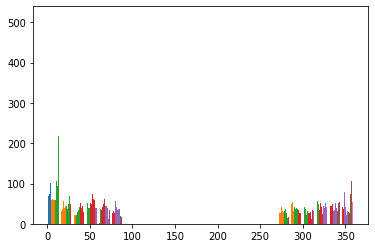

In [41]:
# Plote do histograma da imagem img02
plt.hist(direcoes_img02, bins=24, range=(0,360))

In [ ]:
# Criando histrograma das direções de magnitude da imagem img02
hist_img02 = np.histogram(direcoes_img02, bins=np.arange(0,360,15))